# Importando as Bibliotecas

In [2]:
# import pandas
import pandas as pd
import seaborn as sn

In [3]:
import spacy

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Conhecendo os dados

#### Limpando a tabela

In [5]:
# importando a base de dados CSV
dados = pd.read_csv(filepath_or_buffer='data/spam.csv', sep=",", encoding="latin-1")

In [6]:
# apresentar os 5 primeiros nome da tabela. 
dados.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
dados.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [8]:
# Analizando as informações da tabela
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
# Eliminando colunas vazias.
dados.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1 , inplace=True)

In [10]:
dados.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# Verficar se existe dados duplicados
dados.duplicated().sum()

403

In [12]:
# Removendo dados duplicados
dados.drop_duplicates(inplace=True)
dados.duplicated().sum()

0

In [13]:
dados.reset_index(inplace=True, drop=True)

#### Conversão de nomes e tipos

In [14]:
#renomeando tabela
dados.rename({'v1':'Rotulo','v2':'Mensagem'}, axis=1, inplace=True)
dados.head()

,Rotulo,Mensagem
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
dados.convert_dtypes(convert_string=True)

,Rotulo,Mensagem
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5164,spam,This is the 2nd time we have tried 2 contact u...
5165,ham,Will Ì_ b going to esplanade fr home?
5166,ham,"Pity, * was in mood for that. So...any other s..."
5167,ham,The guy did some bitching but I acted like i'd...


# Analisar os dados

<Axes: xlabel='Rotulo', ylabel='count'>

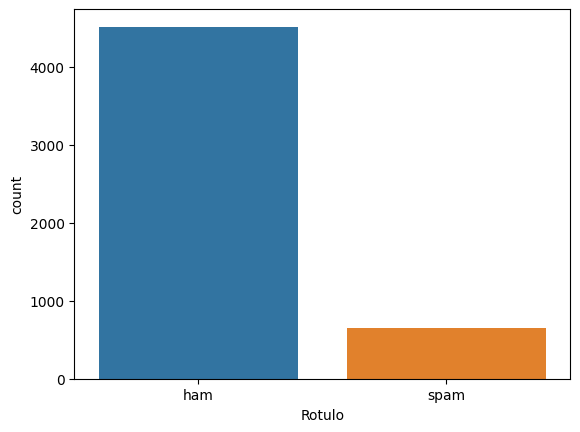

In [16]:
sn.countplot(data=dados, x="Rotulo")

In [17]:
len(dados[dados["Rotulo"] == "spam"])

653

In [18]:
len(dados[dados["Rotulo"] == "ham"])

4516

# Limpando os dados

In [19]:
nlp = spacy.load("en_core_web_md")

In [20]:
def preprocessamento(text):
    doc = nlp(text)
    texto_processado = " ".join([token.lemma_ for token in doc if not token.is_punct and not token.is_stop])
    return texto_processado

In [21]:
dados["Texto_Processado"] = dados["Mensagem"].apply(preprocessamento)

In [22]:
dados.head()

,Rotulo,Mensagem,Texto_Processado
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis n great wor...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,U dun early hor U c
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf live


In [23]:
dados.iloc[4]

Rotulo                                                            ham
Mensagem            Nah I don't think he goes to usf, he lives aro...
Texto_Processado                                nah think go usf live
Name: 4, dtype: object

# Treinando e Testando a Regressão

In [24]:
x = dados["Texto_Processado"]
y = dados["Rotulo"]

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=53)

In [59]:
print(len(list(y for y in y_train if y == "spam")))

481


In [60]:
print(len(list(y for y in y_test if y == "spam")))

172


In [61]:
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

In [62]:
model = LogisticRegression()
model.fit(x_train_tfidf, y_train)

LogisticRegression()

In [63]:
y_pred = model.predict(x_test_tfidf)

In [64]:
print(y_pred)

['ham' 'ham' 'ham' ... 'spam' 'ham' 'ham']


In [65]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")

Acurácia do modelo: 0.97
